In [4]:
pip install tensorflow numpy matplotlib

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [9]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8616 - loss: 0.4695 - val_accuracy: 0.9579 - val_loss: 0.1422
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9642 - loss: 0.1186 - val_accuracy: 0.9687 - val_loss: 0.1111
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9777 - loss: 0.0737 - val_accuracy: 0.9686 - val_loss: 0.1088
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9719 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9673 - val_loss: 0.1158
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0.9743 - val_loss: 0.0969
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9744 - val_loss: 0.1019
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0

In [14]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1129
Test accuracy:97.67%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


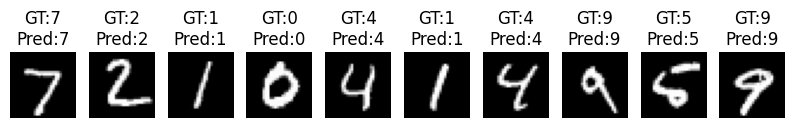

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

predictions = model.predict(x_test)

def display_images(images,labels,preds,num=5, filename="digit_prediction_mnist.png"):
  plt.figure(figsize=(10,5))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.imshow(images[i].reshape(28,28),cmap='gray')
    plt.title(f"GT:{np.argmax(labels[i])}\nPred:{np.argmax(preds[i])}")
    plt.axis('off')

  plt.savefig(filename)
  plt.show()

  files.download(filename)

display_images(x_test,y_test,predictions,num=10)

In [16]:
model.save('mnist_digit_classifier_my.keras')

In [17]:
from google.colab import files
files.download('mnist_digit_classifier_my.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('images')